#Titanic Data Analysis
The main goal of this project is to learn and apply the core steps of data analysis, with a focus on data cleaning and exploratory data analysis (EDA). It aims to build a strong foundation in working with real-world datasets by identifying potential issues, preparing the data, and exploring meaningful patterns through simple visualizations.
This process involves:
1. **Understanding the structure of the dataset** by viewing samples and metadata.
2. **Summarizing key statistics** to gain insights into distributions and data characteristics.
3. Detecting and **handling duplicate records** to maintain data quality.
4. Identifying and deciding on appropriate strategies to **handle missing values.**
5. Create **basic visualizations** to support data understanding.

# Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# Load Data

In [2]:
# import data
df = pd.read_excel('titanic.xlsx')
data = df.copy()

# Chapter 1: Understanding the Dataset

In [3]:
# Showing top 5 rows of the data
data.head()

,survived,name,sex,age
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000
1,1,"Allison, Master. Hudson Trevor",male,0.9167
2,0,"Allison, Miss. Helen Loraine",female,2.0000
3,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000


In [4]:
# Showing last 5 rows of the data
data.tail()

,survived,name,sex,age
495,1,"Mallet, Mrs. Albert (Antoinette Magnin)",female,24.0
496,0,"Mangiavacchi, Mr. Serafino Emilio",male,NaN
497,0,"Matthews, Mr. William John",male,30.0
498,0,"Maybery, Mr. Frank Hubert",male,40.0
499,0,"McCrae, Mr. Arthur Gordon",male,32.0


In [5]:
# sample 5 rows of the data
data.sample(5)

,survived,name,sex,age
402,1,"Duran y More, Miss. Asuncion",female,27.0
475,0,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0
65,1,"Chambers, Mrs. Norman Campbell (Bertha Griggs)",female,33.0
430,0,"Harbeck, Mr. William H",male,44.0
92,1,"Dick, Mrs. Albert Adrian (Vera Gillespie)",female,17.0


My observations:
1. The `survived` and `age` columns are **numerical**
2. The `name` and `sex` columns are **categorical**
3. The `survived` column seems to contain only two distinct number (0 or 1), but we will confirm this later
4. The `sex` column seems to contain only two values ('male' or 'female') and we will verify this later
5. The data values of the `age` column are shown in float data type. The decimal values help provide a more precise age, especially for children under one year old.



In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  500 non-null    int64  
 1   name      500 non-null    object 
 2   sex       500 non-null    object 
 3   age       451 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 15.8+ KB


My Observations:
1. The dataset contains 4 columns with 500 rows
2. Only `age` column has missing values (49 rows of missing values), but we will handle this later.
3. All the data types seems appropriate, given the corresponding column name

# Chapter 2: Explore the Data

In [7]:
data.columns

Index(['survived', 'name', 'sex', 'age'], dtype='object')

In [8]:
# Splitting columns into categorical and numerical types to apply appropriate statistical summaries
categoricals = ['name', 'sex']

numericals = ['survived', 'age']

## Describe Numerical Columns

In [9]:
data[numericals].describe()

,survived,age
count,500.000000,451.000000
mean,0.540000,35.917775
std,0.498897,14.766454
min,0.000000,0.666700
25%,0.000000,24.000000
50%,1.000000,35.000000
75%,1.000000,47.000000
max,1.000000,80.000000


My Observations:
1. The min and max values make sense for each column.
2. Mean ~ 50%(median) in `age` value indicating somewhat a symmetrical distribution.
3. The `survived` column is boolean/binary column since the value is either 0 or 1, so we don't need to conclude its simmetricity. We only need to check the balance level.
4. Given the mean of `survived` = `0.54` (just a bit over 0.5), we can conclude that there are slightly more survivors (1s) than non-survivors (0).


## Describe Categorical Columns

In [10]:
data[categoricals].describe()

,name,sex
count,500,500
unique,499,2
top,"Eustis, Miss. Elizabeth Mussey",male
freq,2,288


My Observations:
1. The `name `column has 2 duplicated values, shown by the 499 unique values instead of 500.
2. The Titanic survivors are mostly male (288 rows), and the rest are female.
3. There are no missing values in categorical columns.

## Numerical Details

In [11]:
for col in numericals:
    print(f"==== {col} ====")
    display(data[col].value_counts())
    print()

==== survived ====


,count
survived,
1,270
0,230



==== age ====


,count
age,
24.0000,23
30.0000,20
36.0000,19
18.0000,14
42.0000,14
45.0000,14
35.0000,14
22.0000,12
28.0000,12


My Observations:
1. The dataset shows that 270 passengers survived, which is slightly higher than the 230 passengers who did not survive. This suggests a relatively balanced but survival-favored distribution.
2. The ages 24, 30, and 36 occur most frequently among passengers, indicating these age groups were more common on board.

## Categorical Details

In [12]:
for col in categoricals:
    print(f"Value counts of {col} column")
    display(data[col].value_counts())
    print()

Value counts of name column


,count
name,
"Eustis, Miss. Elizabeth Mussey",2
"Becker, Miss. Ruth Elizabeth",1
"Becker, Miss. Marion Louise",1
"Becker, Master. Richard F",1
"Beauchamp, Mr. Henry James",1
"Beane, Mrs. Edward (Ethel Clarke)",1
"Beane, Mr. Edward",1
"Bateman, Rev. Robert James",1
"Banfield, Mr. Frederick James",1



Value counts of sex column


,count
sex,
male,288
female,212


My Observations:
1. Two duplicate entries were found with the name "Eustis, Miss. Elizabeth Mussey".
2. The number of male passengers (288) is higher than female passengers (212), indicating a gender imbalance in the dataset.

# Chapter 3: Data Cleansing

## Handing Duplicated Values

In [13]:
len(data.drop_duplicates())/len(data)

0.998

My Observation:
* There are duplicated values in this dataset, proved by the above simple equation that is below 1.

In [14]:
list(data.columns)

['survived', 'name', 'sex', 'age']

In [15]:
# Step 1: capture the duplicated rows
duplicates = data[data.duplicated(keep=False)]

# Step 2: Count the each occurence of the duplicated rows
duplicate_counts = duplicates.groupby(list(data.columns)).size().reset_index(name='duplicate_count')

# Step 3: Sort the duplicated rows descending
sorted_duplicates = duplicate_counts.sort_values(by='duplicate_count', ascending=False)

sorted_duplicates

,survived,name,sex,age,duplicate_count
0,1,"Eustis, Miss. Elizabeth Mussey",female,54.0,2


My Observation:
*   The only duplicate found in the dataset is the name "Eustis, Miss. Elizabeth Mussey", which appears twice. No other duplicate records were detected.




In [16]:
# Handling the duplicated data by using Drop Duplicate
data = data.drop_duplicates()

In [17]:
# Let's check using the simple equation we've used first
len(data.drop_duplicates())/len(data)

1.0

The value of this simple equation turns out to be 1 and that means there's no duplicated value anymore.

## Handling Missing Values

In [18]:
# Identifying the missing values
data.isna().sum()

,0
survived,0
name,0
sex,0
age,49


In [19]:
data.isnull().sum()

,0
survived,0
name,0
sex,0
age,49


In [20]:
for col in numericals:
    print(f"==== {col} ====")
    display(data[col].value_counts())
    print()

==== survived ====


,count
survived,
1,269
0,230



==== age ====


,count
age,
24.0000,23
30.0000,20
36.0000,19
18.0000,14
42.0000,14
45.0000,14
35.0000,14
22.0000,12
28.0000,12


In [21]:
total_rows = len(data)

for col in data.columns:
    missing_count = data[col].isna().sum()
    missing_percentage = (missing_count / total_rows) * 100
    print(f"Column: {col}, Missing Count: {missing_count}, Missing Percentage: {missing_percentage:.2f}%")

Column: survived, Missing Count: 0, Missing Percentage: 0.00%
Column: name, Missing Count: 0, Missing Percentage: 0.00%
Column: sex, Missing Count: 0, Missing Percentage: 0.00%
Column: age, Missing Count: 49, Missing Percentage: 9.82%


The percentage of missing values below 20%, so we can handle numericals using median and categorical using mode. Since the categoricals (`name` & `sex`) and one of numericals (`survived`) don't have any missing values, we're focusing on the `age` numericals column.

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 499 entries, 0 to 499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  499 non-null    int64  
 1   name      499 non-null    object 
 2   sex       499 non-null    object 
 3   age       450 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 19.5+ KB


In [23]:
data['age'].median()

35.0

In [24]:
#Handling the missing value specifically on 'age' column using .fillna() method
data['age'] = data['age'].fillna(data['age'].median())

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 499 entries, 0 to 499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  499 non-null    int64  
 1   name      499 non-null    object 
 2   sex       499 non-null    object 
 3   age       499 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 19.5+ KB


In [26]:
# Validate the percentage of missing values
total_rows = len(data)

for col in data.columns:
    missing_count = data[col].isna().sum()
    missing_percentage = (missing_count / total_rows) * 100
    print(f"Column: {col}, Missing Count: {missing_count}, Missing Percentage: {missing_percentage:.2f}%")

Column: survived, Missing Count: 0, Missing Percentage: 0.00%
Column: name, Missing Count: 0, Missing Percentage: 0.00%
Column: sex, Missing Count: 0, Missing Percentage: 0.00%
Column: age, Missing Count: 0, Missing Percentage: 0.00%


All the missing percentage value of each column are 0% and that means there's no missing value anymore.

# Chapter 4: Get to Know the Data

## Gender Distribution

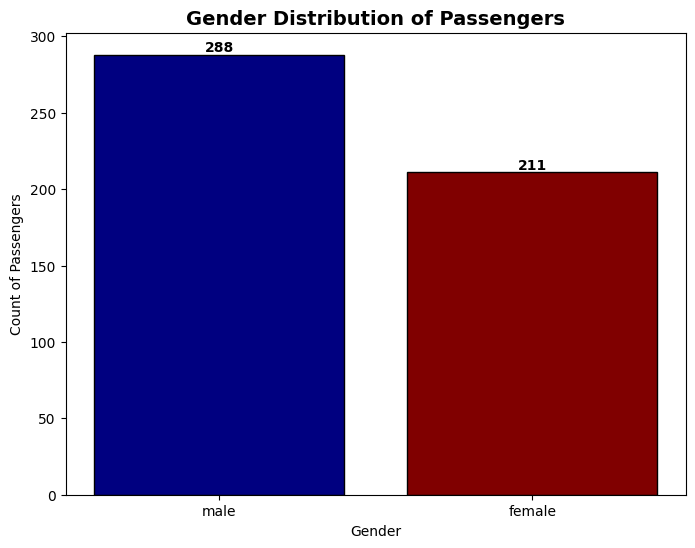

In [27]:
gender_counts = data['sex'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(gender_counts.index, gender_counts.values, color=['navy', 'maroon'], edgecolor='black')
plt.title('Gender Distribution of Passengers', fontsize=14, fontweight='bold')
plt.xlabel('Gender')
plt.ylabel('Count of Passengers')

for i, v in enumerate(gender_counts.values):
    plt.text(i, v + 2, str(v), ha='center', fontweight='bold')

## Survival Count by Gender

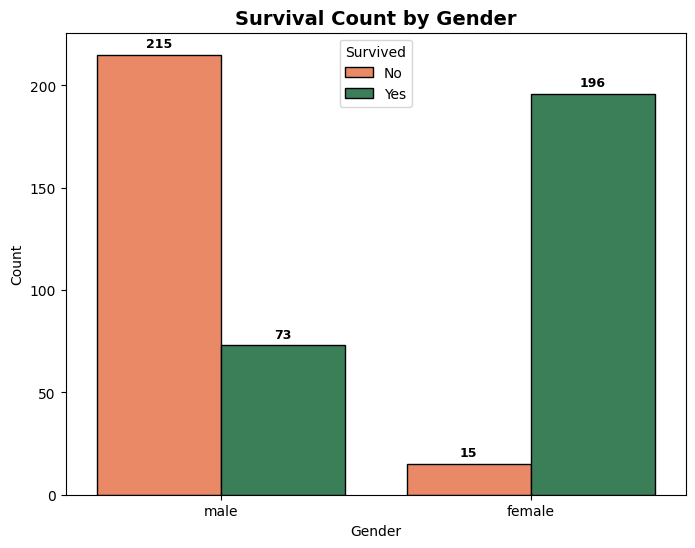

In [28]:
plt.figure(figsize=(8, 6))
survival_count_gender = sns.countplot(x='sex', hue='survived', data=data, order=['male', 'female'], palette={0: 'coral', 1: 'seagreen'}, edgecolor='black')
plt.title('Survival Count by Gender', fontsize = 14, fontweight = 'bold')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])

for container in survival_count_gender.containers:
    survival_count_gender.bar_label(container, fmt='%d', label_type='edge', padding=3, fontsize=9, fontweight='bold')

## Average Survival Rate by Gender

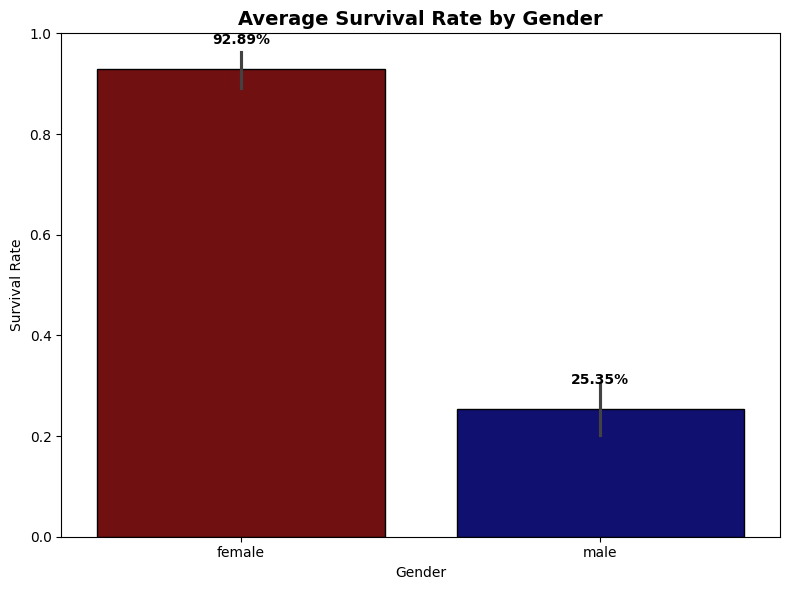

In [29]:
plt.figure(figsize=(8, 6))

# Barplot: automatically uses the mean of 'survived' grouped by 'sex'
sns.barplot(x='sex', y='survived', data=data, hue = 'sex', legend = False, palette={'male': 'navy', 'female': 'maroon'}, edgecolor='black')

plt.title('Average Survival Rate by Gender', fontsize=14, fontweight='bold')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)

# Add percentage labels on top of bars
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,
        height + 0.05,
        f'{height:.2%}',  # convert to percentage
        ha='center',
        fontsize=10,
        fontweight='bold'
    )

plt.tight_layout()
plt.show()
